In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
# Using kaggle api command for dataset
!kaggle datasets download -d amulyas/penguin-size-dataset

  0% 0.00/2.85k [00:00<?, ?B/s]
100% 2.85k/2.85k [00:00<00:00, 5.66MB/s]


In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!unzip /content/penguin-size-dataset.zip

Archive:  /content/penguin-size-dataset.zip
  inflating: penguins_size.csv       


In [5]:
import pandas as pd
penguins_df = pd.read_csv("penguins_size.csv")

In [6]:
penguins_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
# checking for the number of rows and columns
penguins_df.shape

(344, 7)

In [8]:
# using info method to check the datatype and null values
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
penguins_df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [10]:
#values count in the column
penguins_df["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [12]:
penguins_df["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [14]:
# calculating the average of culmen_lenght_mm ,culmen_depth_mm ,flipper_length_mm
print(penguins_df["culmen_length_mm"].mean())
print(penguins_df["culmen_depth_mm"].mean())
print(penguins_df["flipper_length_mm"].mean())

43.9219298245614
17.151169590643278
200.91520467836258


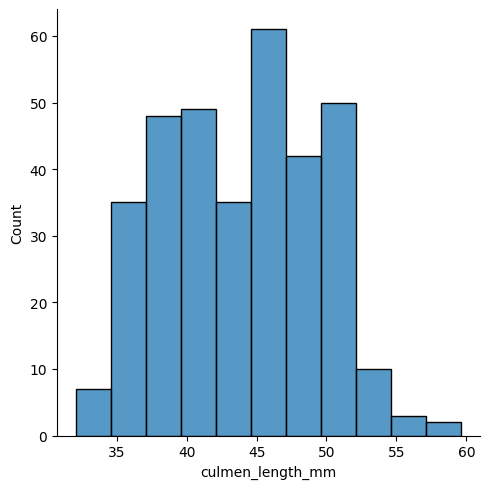

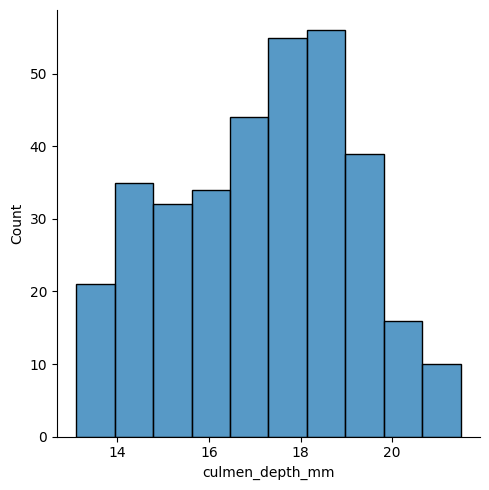

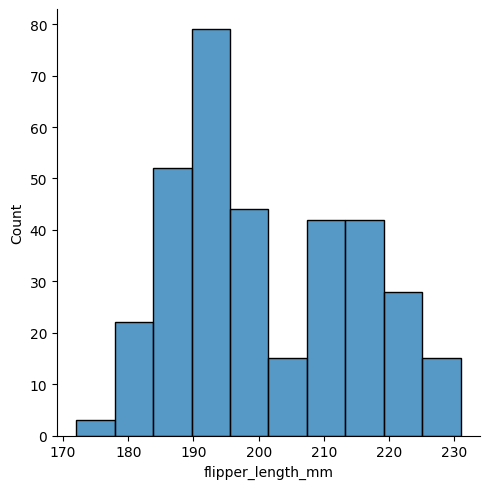

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(penguins_df["culmen_length_mm"])
plt.show()
sns.displot(penguins_df["culmen_depth_mm"])
plt.show()
sns.displot(penguins_df["flipper_length_mm"])
plt.show()


In [16]:
# Checking from where adelie species mostly belong to
adelie_island_counts = penguins_df[penguins_df["species"] == "Adelie"]["island"].value_counts()
print(f"Adelie penguins mostly belong to: {adelie_island_counts.index[0]} with {adelie_island_counts.values[0]} penguins.")

# Checking from where chinstrap species mostly belong to
chinstrap_island_counts = penguins_df[penguins_df["species"] == "Chinstrap"]["island"].value_counts()
print(f"Chinstrap penguins mostly belong to: {chinstrap_island_counts.index[0]} with {chinstrap_island_counts.values[0]} penguins.")

# Checking from where Gentoo species mostly belong to
gentoo_island_counts = penguins_df[penguins_df["species"] == "Gentoo"]["island"].value_counts()
print(f"Gentoo penguins mostly belong to: {gentoo_island_counts.index[0]} with {gentoo_island_counts.values[0]} penguins.")


Adelie penguins mostly belong to: Dream with 56 penguins.
Chinstrap penguins mostly belong to: Dream with 68 penguins.
Gentoo penguins mostly belong to: Biscoe with 124 penguins.


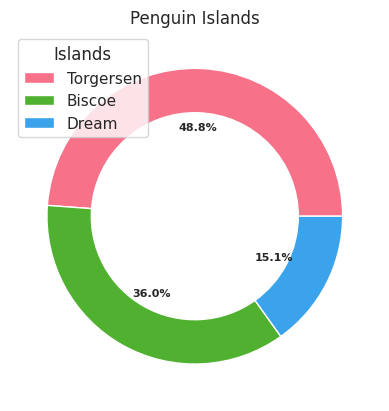

In [17]:

sns.set(style="whitegrid")
sizes = penguins_df['island'].value_counts()
labels = penguins_df['island'].unique()
colors = sns.color_palette('husl', len(labels))

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct="%1.1f%%", startangle=360, wedgeprops=dict(width=0.3))

ax.legend(wedges, labels, loc="upper left", title="Islands")

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Penguin Islands")
plt.show()


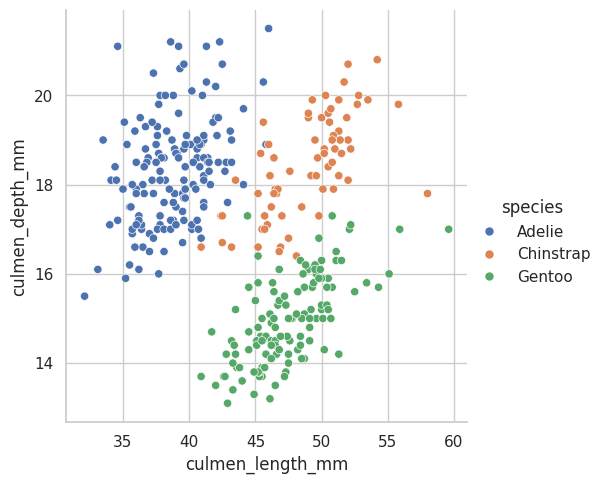

In [18]:
# bivariate analysis
sns.relplot(x = "culmen_length_mm", y = "culmen_depth_mm", hue = "species", data = penguins_df)
plt.show()


In [19]:
# Create a dictionary to store the results
species_details = {}

# Loop through each species
for species in penguins_df["species"].unique():
    # Filter the dataframe by species
    species_df = penguins_df[penguins_df["species"] == species]

    # Calculate the mean of the desired columns for the current species
    species_details[species] = species_df.loc[:, "culmen_length_mm":"body_mass_g"].mean()

# Print the results
for species, details in species_details.items():
    print(f"Species: {species}")
    print(details)
    print()


Species: Adelie
culmen_length_mm       38.791391
culmen_depth_mm        18.346358
flipper_length_mm     189.953642
body_mass_g          3700.662252
dtype: float64

Species: Chinstrap
culmen_length_mm       48.833824
culmen_depth_mm        18.420588
flipper_length_mm     195.823529
body_mass_g          3733.088235
dtype: float64

Species: Gentoo
culmen_length_mm       47.504878
culmen_depth_mm        14.982114
flipper_length_mm     217.186992
body_mass_g          5076.016260
dtype: float64



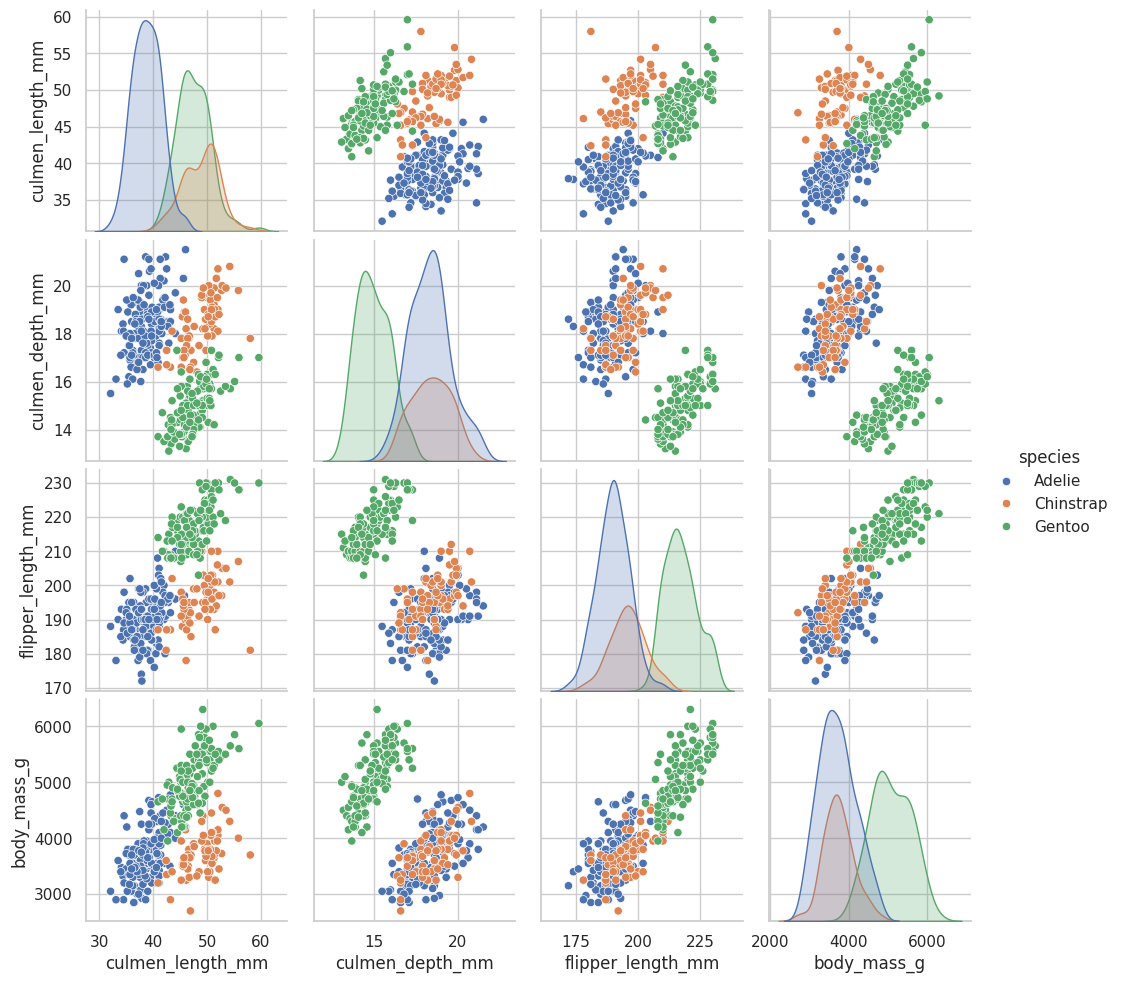

In [20]:
# muli-variate graph
sns.pairplot(penguins_df, hue="species")
plt.show()


In [23]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [24]:
# checking for duplicate values
penguins_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
339    False
340    False
341    False
342    False
343    False
Length: 344, dtype: bool

In [26]:
# Checking for dupliacte rows all across the columns
duplicated_rows=penguins_df[penguins_df.duplicated()]
duplicated_rows

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [27]:
# missing value
penguins_df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [29]:
# Handling the null values
penguins_df["culmen_length_mm"].fillna(penguins_df["culmen_length_mm"].mean(), inplace=True)
penguins_df["culmen_depth_mm"].fillna(penguins_df["culmen_depth_mm"].mean(), inplace=True)
penguins_df["flipper_length_mm"].fillna(penguins_df["flipper_length_mm"].mean(), inplace=True)
penguins_df["body_mass_g"].fillna(penguins_df["body_mass_g"].mean(), inplace=True)
penguins_df["sex"].fillna(penguins_df["sex"].mode()[0], inplace=True)
penguins_df.isnull().sum()


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [31]:
import numpy as np

# Replace periods with NaN
penguins_df.loc[penguins_df["sex"] == ".", "sex"] = np.nan


In [33]:
# Fill NaN values with the mode
penguins_df["sex"].fillna(penguins_df["sex"].mode()[0], inplace=True)


In [35]:
penguins_df["sex"].value_counts()

sex
MALE      179
FEMALE    165
Name: count, dtype: int64

<Axes: ylabel='culmen_depth_mm'>

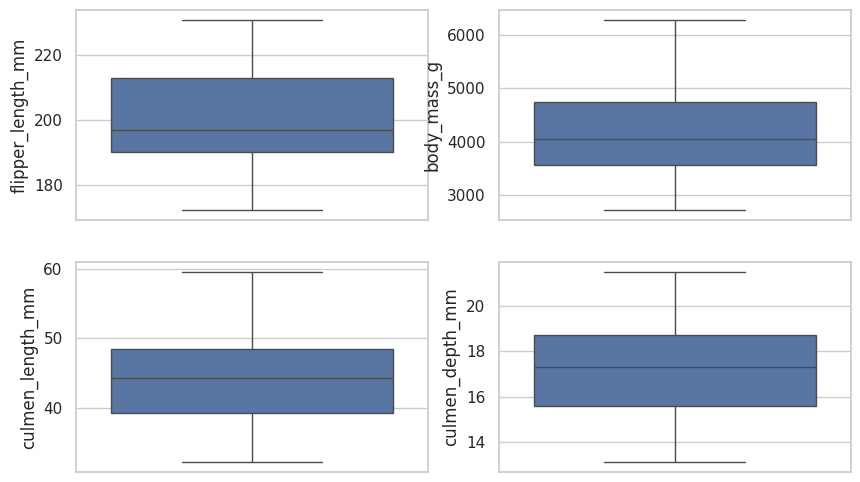

In [36]:
import matplotlib.pyplot as plt

# Checking for outliers
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.boxplot(penguins_df["flipper_length_mm"])

plt.subplot(2,2,2)
sns.boxplot(penguins_df["body_mass_g"])

plt.subplot(2,2,3)
sns.boxplot(penguins_df["culmen_length_mm"])

plt.subplot(2,2,4)
sns.boxplot(penguins_df["culmen_depth_mm"])


In [38]:
penguins_df=pd.get_dummies(penguins_df, columns = ['species', 'island','sex'] )
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,True,False,False,False,False,True,False,True
1,39.50000,17.40000,186.000000,3800.000000,True,False,False,False,False,True,True,False
2,40.30000,18.00000,195.000000,3250.000000,True,False,False,False,False,True,True,False
3,43.92193,17.15117,200.915205,4201.754386,True,False,False,False,False,True,False,True
4,36.70000,19.30000,193.000000,3450.000000,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,False,False,True,True,False,False,False,True
340,46.80000,14.30000,215.000000,4850.000000,False,False,True,True,False,False,True,False
341,50.40000,15.70000,222.000000,5750.000000,False,False,True,True,False,False,False,True
342,45.20000,14.80000,212.000000,5200.000000,False,False,True,True,False,False,True,False


In [40]:
X = penguins_df.iloc[:,np.r_[0:4,7:11]]
print(X)
y= penguins_df.iloc[:,4:7]
print(y)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0            39.10000         18.70000         181.000000  3750.000000   
1            39.50000         17.40000         186.000000  3800.000000   
2            40.30000         18.00000         195.000000  3250.000000   
3            43.92193         17.15117         200.915205  4201.754386   
4            36.70000         19.30000         193.000000  3450.000000   
..                ...              ...                ...          ...   
339          43.92193         17.15117         200.915205  4201.754386   
340          46.80000         14.30000         215.000000  4850.000000   
341          50.40000         15.70000         222.000000  5750.000000   
342          45.20000         14.80000         212.000000  5200.000000   
343          49.90000         16.10000         213.000000  5400.000000   

     island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  
0            False         False              

In [41]:
penguins_df = penguins_df.astype(int)


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.88708123,  0.78774251, -1.42248782, ..., -0.75075719,
         2.36968028, -0.96009776],
       [-0.81349399,  0.12655633, -1.06535169, ..., -0.75075719,
         2.36968028,  1.0415606 ],
       [-0.66631952,  0.43171918, -0.42250666, ..., -0.75075719,
         2.36968028,  1.0415606 ],
       ...,
       [ 1.1917582 , -0.73807176,  1.50602843, ..., -0.75075719,
        -0.42199786, -0.96009776],
       [ 0.23512413, -1.19581604,  0.79175618, ..., -0.75075719,
        -0.42199786,  1.0415606 ],
       [ 1.09977416, -0.53462985,  0.8631834 , ..., -0.75075719,
        -0.42199786, -0.96009776]])

In [45]:
X.shape

(344, 8)

In [46]:
y.shape

(344, 3)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
# k-means model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
pred = knn.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        25

   micro avg       0.99      0.99      0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69
 samples avg       0.99      0.99      0.99        69



In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

In [53]:
#Evaluate the Model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy=accuracy_score(y_test,pred)
conmat=confusion_matrix(y_test.values.argmax(axis=1),pred.argmax(axis=1))


In [54]:
print(accuracy)
print(conmat)

1.0
[[34  0  0]
 [ 0 10  0]
 [ 0  0 25]]


In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        25

   micro avg       1.00      1.00      1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69
 samples avg       1.00      1.00      1.00        69



In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming that `features` are your dataset's features and `labels` are your dataset's labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9855072463768116
